In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('ads_data.csv')
df

,Advertising Cost (USD),Sales Revenue (USD)
0,784,5167.683485
1,659,4736.040926
2,729,4799.105662
3,292,2307.039663
4,935,5917.849078
5,863,5753.385395
6,807,5348.687786
7,459,3390.113449
8,109,841.300662
9,823,5324.660476


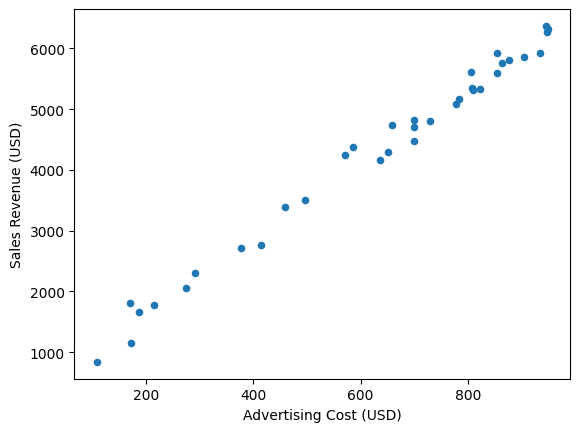

In [4]:
df.plot.scatter(
    x = 'Advertising Cost (USD)',
    y = "Sales Revenue (USD)"
)
plt.show()

In [5]:
df['Advertising Cost (USD)'].corr(df['Sales Revenue (USD)'])

0.9940740630509899

In [ ]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
x = df.iloc[: ,0:1]
y = df.iloc[:, 1:2]
model.fit(x,y)


LinearRegression()

In [8]:
# Do doc
model.coef_

array([[6.14733189]])

In [9]:
# He so chan
model.intercept_

array([423.64529827])

In [12]:
# Du doan gia tri voi x = 600 (x: la so tien quang cao)
# y = ax + b ~ y = 6.14x + 423,64
model.predict(pd.DataFrame([600]))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4112.04443118]])

In [14]:
model.predict(pd.DataFrame([107,934,512]))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1081.40981031],
       [6165.25328183],
       [3571.07922502]])

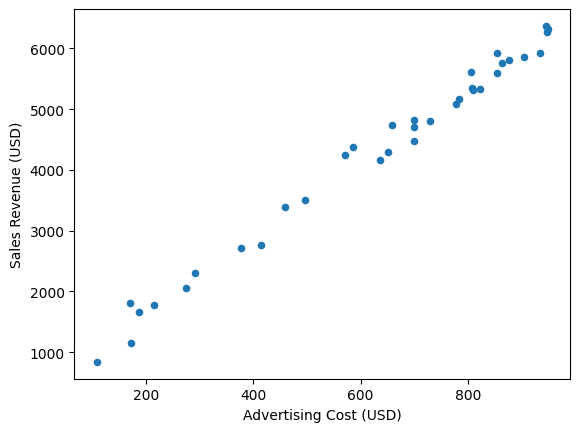

In [13]:
df.plot.scatter(
    x = 'Advertising Cost (USD)',
    y = "Sales Revenue (USD)"
)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(28, 1) (28, 1)
(7, 1) (7, 1)


In [19]:
new_model = LinearRegression()
new_model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_predict = new_model.predict(X_test)

In [21]:
new_model.intercept_, new_model.coef_

(array([477.1814076]), array([[6.07996297]]))

In [22]:
mse = mean_squared_error(y_test, y_predict)
mse

53852.56448015925

In [24]:
r2 = r2_score(y_test, y_predict)
r2

0.9696953486116257

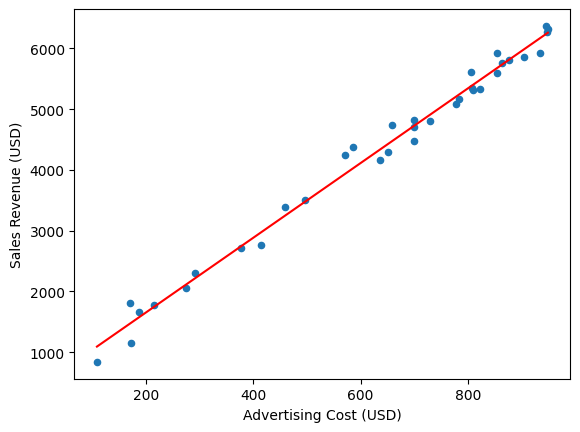

In [31]:
df.plot.scatter(
    x="Advertising Cost (USD)",
    y="Sales Revenue (USD)"
)
X_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = model.intercept_ + model.coef_[0] * X_line
plt.plot(X_line, y_line, color='red', label='Best fit line')
plt.show()

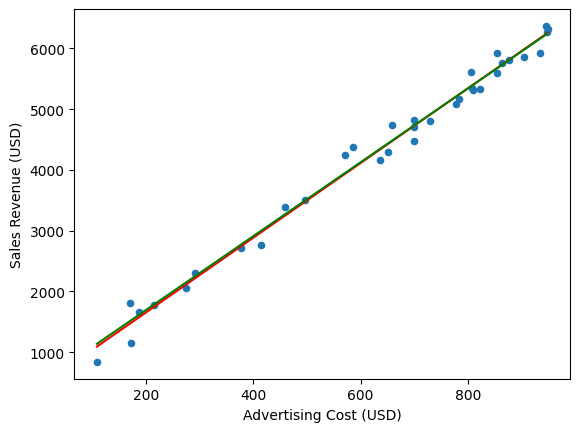

In [33]:
df.plot.scatter(
    x = "Advertising Cost (USD)",
    y = "Sales Revenue (USD)"
)
X_line = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_line = model.intercept_ + model.coef_[0]*X_line
plt.plot(X_line, y_line, color='red',label='Best fit line')
new_y_line = new_model.intercept_ + new_model.coef_[0]*X_line
plt.plot(X_line, new_y_line, color='green',label='New best fit line')
plt.show()
